# Zadanie 1

## $f(x,y)=x^2-4xy+y^2$

Pochodne cząstkowe tej funkcji wynoszą
$$\frac{\partial{f}}{\partial{x}}=2x-4y$$
$$\frac{\partial{f}}{\partial{y}}=2y-4x$$

Punkty krytyczne można znaleźć rozwiązując liniowy układ równań

$$
\begin{bmatrix}
2 & -4 \\
-4 & 2 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
$$

In [1]:
import numpy as np

In [2]:
A = np.array([[2, -4], [-4, 2]])
b = np.array([0, 0])
x, y = np.linalg.solve(A, b)
print(f"x = {x}, y = {y}")

x = -0.0, y = -0.0


W wyniku czego otrzymujemy
$$
\begin{bmatrix}
x \\
y \\
\end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
$$

Macierz Hessego $\boldsymbol{H}$ wygląda następująco
$$
\boldsymbol{H}=
\begin{bmatrix}
2 & -4 \\
-4 & 2 \\
\end{bmatrix}
$$

Minory tej macierzy mają następujące wyznaczniki
$$
\begin{cases}
\boldsymbol{H}_1=2 \\
\boldsymbol{H}_2=4-16=-12
\end{cases}
$$

Macierz jest nieokreślona, zatem punkt $(x,y)=(0,0)$ jest punktem siodłowym.

Funkcja jest nieograniczona, zatem nie posiada minimum ani maksimum globalnego.

## $f(x,y)=x^4-4xy+y^4$

Pochodne cząstkowe
$$\frac{\partial{f}}{\partial{x}}=4x^3-4y$$
$$\frac{\partial{f}}{\partial{y}}=4y^3-4x$$

Aby znaleźć punkty krytyczne należy rozwiązać nieliniowy układ równań
$$
\begin{cases}
4x^3-4y=0 \\
4y^3-4x=0 \\
\end{cases}
$$

In [3]:
import scipy.optimize as spo

In [4]:
def fprime(args):
    x = args[0]
    y = args[1]
    return [
        4*x**3 - 4*y,
        4*y**3 - 4*x
    ]

Potencjalne rozwiązania układu można łatwo oszacować analitycznie.

In [5]:
x1, y1 = spo.fsolve(fprime, (0, 0))
x2, y2 = spo.fsolve(fprime, (1, 1))
x3, y3 = spo.fsolve(fprime, (-1, -1))

In [6]:
print(f"(x1, y1) = ({x1}, {y1}), (x2, y2) = ({x2}, {y2}), (x3, y3) = ({x3}, {y3})")

(x1, y1) = (0.0, 0.0), (x2, y2) = (1.0, 1.0), (x3, y3) = (-1.0, -1.0)


Otrzymaliśmy 3 punkty krytyczne
$$
\begin{cases}
P_1=(0,0) \\
P_2=(1,1) \\
P_3=(-1,-1) \\
\end{cases}
$$

Macierz Hessego
$$
\boldsymbol{H}(x,y)=
\begin{bmatrix}
12x^2 & -4 \\
-4 & 12y^2 \\
\end{bmatrix}
$$

In [7]:
def make_hessian(P):
    x = P[0]
    y = P[1]
    return np.array([
        [12*x**2, -4],
        [-4, 12*y**2]
    ])

In [8]:
P1 = (x1, y1)
P2 = (x2, y2)
P3 = (x3, y3)

In [9]:
H1 = make_hessian(P1)
try:
    np.linalg.cholesky(H1)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is NOT positive definite!


Macierz nie jest dodatnio określona, niestety trzeba teraz ręcznie sprawdzić, czy jest ujemnie określona

$$
\boldsymbol{H}(0,0)=
\begin{bmatrix}
0 & -4 \\
-4 & 0 \\
\end{bmatrix}
$$

$$
\begin{cases}
\boldsymbol{H}_1=0 \\
\boldsymbol{H}_2=-16 \\
\end{cases}
$$

Macierz jest nieokreślona, zatem punkt $(0,0)$ jest punktem siodłowym.

In [10]:
H2 = make_hessian(P2)
try:
    np.linalg.cholesky(H2)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is positive definite!


Macierz $\boldsymbol{H}(1,1)$ jest dodatnio określona, zatem w punkcie $(1,1)$ funkcja przyjmuje minimum.

In [11]:
H3 = make_hessian(P3)
try:
    np.linalg.cholesky(H3)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is positive definite!


Macierz $\boldsymbol{H}(1,1)$ również jest dodatnio określona, zatem w punkcie $(1,1)$ funkcja przyjmuje minimum.

In [12]:
f = lambda x, y: x**4 - 4*x*y + y**4
val2 = f(x2, y2)
val3 = f(x3, y3)
print(val2, val3)

-2.0 -2.0


Funkcja przyjmuje takie same wartości w punktach $P_1$ i $P_2$, punkty te są minimami globalnymi

## $f(x,y)=2x^3-3x^2-6xy(x-y-1)$

Pochodne cząstkowe wynoszą
$$\frac{\partial{f}}{\partial{x}}=6(x^2-2xy-x+y^2+y)$$
$$\frac{\partial{f}}{\partial{y}}=-6x(x-2y-1)$$

$$
\begin{cases}
x^2-2xy-x+y^2+y=0 \\
x^2-2yx-x=0 \\
\end{cases}
$$

In [13]:
def fprime(P):
    x = P[0]
    y = P[1]
    return [
        x**2 - 2*x*y - x + y**2 + y,
        x**2 - 2*x*y - x
    ]

In [14]:
solution_set = set()
for x in range(-1, 2):
    for y in range(-1, 2):
        sol_x, sol_y = spo.fsolve(fprime, (x, y))
        solution_set.add((round(sol_x, 5), round(sol_y, 5)))
print(*solution_set, sep="\n")

(1.0, 0.0)
(0.0, -1.0)
(-1.0, -1.0)
(0.0, 0.0)


Funkcja ma 4 punkty krytyczne
$$
\begin{cases}
P_1=(-1,-1) \\
P_2=(0,0) \\
P_3=(1,0) \\
P_4=(0,-1) \\
\end{cases}
$$

Macierz Hessego
$$
\boldsymbol{H}(x,y)=
\begin{bmatrix}
12x-12y-6 & -6(x-y-1)-6x+6y \\
-6(x-y-1)-6x+6y & 12x \\
\end{bmatrix}
$$

In [15]:
def make_hessian(P):
    x = P[0]
    y = P[1]
    return np.array([
        [12*x-12*y-6, -6*(x-y-1) - 6*x + 6*y],
        [-6*(x-y-1) - 6*x + 6*y, 12*x]
    ])

In [16]:
# returns 1 if negative definite, -1 if semi definite and 0 if indefinite
def check_negative_definite(H):
    flag = True
    if H[0][0] > 0:
        return 0
    elif H[0][0] == 0:
        flag = False

    det = np.linalg.det(H)
    if det < 0:
        return 0
    elif det == 0:
        flag = False

    return 1 if flag else -1

In [17]:
H1 = make_hessian((-1, -1))
try:
    np.linalg.cholesky(H1)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is NOT positive definite!


Macierz nie jest dodatnio określona, trzeba ją sprawdzić ręcznie.

In [18]:
check_negative_definite(H1)

1

Funkcja zwróciła 1, co oznacza, że macierz jest ujemnie określona, zatem w punkcie $(-1,-1)$ występuje maksimum.

In [19]:
H2 = make_hessian((0, 0))
try:
    np.linalg.cholesky(H2)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is NOT positive definite!


In [20]:
check_negative_definite(H2)

0

Macierz jest nieokreślona, co oznacza, że punkt $(0,0)$ jest punktem siodłowym.

In [21]:
H3 = make_hessian((1, 0))
try:
    np.linalg.cholesky(H3)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is positive definite!


Macierz jest dodatnio określona, w punkcie $(1,0)$ jest minimum.

In [22]:
H4 = make_hessian((0, -1))
try:
    np.linalg.cholesky(H4)
except np.linalg.LinAlgError:
    print("H1 is NOT positive definite!")
else:
    print("H1 is positive definite!")

H1 is NOT positive definite!


In [23]:
check_negative_definite(H4)

0

Macierz jest nieokreślona, punkt $(0,-1)$ jest punktem siodłowym

Funkcja nie posiada maksimum ani minimum globalnego.

## $f(x,y)=(x-y)^4+x^2-y^2-2x+2y+1$

$$\frac{\partial{f}}{\partial{x}}=4(x-y)^3+2x-1$$
$$\frac{\partial{f}}{\partial{y}}=-4(x-y)^3-2y+2$$

In [24]:
def fprime(P):
    x = P[0]
    y = P[1]
    return [
        4*(x-y)**3 + 2*x - 1,
        -4*(x-y)**3 - 2*y + 2
    ]

In [25]:
solution_set = set()
for x in range(-2, 3):
    for y in range(-2, 3):
        sol_x, sol_y = spo.fsolve(fprime, (x, y))
        solution_set.add((round(sol_x, 5), round(sol_y, 5)))
print(*solution_set, sep="\n")

(0.75, 1.25)


Funkcja ma tylko 1 punkt krytyczny $P=(0.75,1.25)$

Macierz Hessego dla punktu $P$
$$
\boldsymbol{H}=
\begin{bmatrix}
5 & -3 \\
-3 & 1 \\
\end{bmatrix}
$$

$$
\begin{cases}
\boldsymbol{H}_1=5 \\
\boldsymbol{H}_2=5-9=-4 \\
\end{cases}
$$

Macierz jest nieokreślona, punkt $(0.75,1.25)$ jest punktem siodłowym, funkcja nie ma minimum ani maksimum globalnego.

# Zadanie 2

$$F(\textbf{x})=\lambda_1\sum_{i=0}^n\sum_{j=0}^{k-1}\frac{1}{\epsilon+||x_i-r_j||_2^2}+\lambda_2\sum_{i=0}^{n-1}||x_{i+1}-x_i||_2^2$$
$$F:\mathbb{R}^{n\times2}\rightarrow\mathbb{R}$$

Funkcja największego spadku dla $\textbf{x}$.

$$\nabla{}F(\textbf{x})=\frac{\partial{F}}{\partial{\textbf{x}}}=-\lambda_1\sum_{j=0}^{k-1}\left[\frac{2(x_i-r_j)}{(\epsilon+||x_i-r_j||_2^2)^2}\right]+\lambda_2(-2(x_{i+1}-x_i)+2(x_i-x_{i-1}))$$
$$\nabla{}F:\mathbb{R}^{n\times2}\rightarrow\mathbb{R}^{n\times2}$$

Algorytm najmniejszego spadku wykorzystuje poczkątkowe ustawienie punktów $\textbf{x}_0$, następnie na ich podstawie wyliczane są następne ustawienia, dla których funkcja osiąga coraz mniejsze wartości.
$$\textbf{x}_{k+1}=\textbf{x}_k-\alpha_k\nabla{}F(\textbf{x}_k)$$
Gdzie $\alpha$ szukane jest poprzez minimalizację
$$\min_{\alpha}F(\textbf{x}_k-\alpha\nabla{}F(\textbf{x}_k))$$
Minimalizacja jest minimalizacją jednej zmiennej $\alpha$, więc można zastosować algorytm *golden section search*.  
Do minimalizacji *golden section search* jako przedział podstawowy został wybrany przedział $[0,441]$, ze względu na wymiary planszy robota $21\times21$

In [26]:
import random
from copy import deepcopy
import matplotlib.pyplot as plt

In [27]:
def F(x, r):
    lambda1 = lambda2 = 1
    n = len(x)
    k = len(r)
    epsilon = 1e-13

    res1 = 0
    for i in range(n):
        for j in range(k):
            res1 += 1 / (epsilon + np.linalg.norm(x[i] - r[j])**2)

    res1 *= lambda1

    res2 = 0
    for i in range(n-1):
        res2 += np.linalg.norm(x[i+1] - x[i])**2

    res2 *= lambda2

    return res1 + res2
        

def gradient(x, r):
    lambda1 = lambda2 = 1
    n = len(x)
    k = len(r)
    epsilon = 1e-13

    res = [None for _ in range(n)]
    for i in range(1, n-1):
        res[i] = -lambda1 * np.sum([(2 * (x[i] - r[j])) / (epsilon + np.linalg.norm(x[i] - r[j])**2)**2 for j in range(k)], axis=0) + lambda2*(-2*(x[i+1] - x[i]) + 2*(x[i] - x[i] - 1))

    res[0] = np.array([0, 0])
    res[-1] = np.array([0, 0])
    return np.array(res)

In [28]:
def golden_search(f, x, r):
    a = 0
    b = 441
    t = (np.sqrt(5)-1) / 2
    x1 = a + (1 - t) * (b - a)
    f1 = f(x1, x, r)
    x2 = a + t*(b-a)
    f2 = f(x2, x, r)
    tol = 1e-5
    while (b-a) > tol:
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + t*(b-a)
            f2 = f(x2, x, r)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (1 - t) * (b - a)
            f1 = f(x1, x, r)

    return (a+b)/2

def F_min(alfa, x0, r):
    return F(x0 - alfa * gradient(x0, r), r)

def minimize(x, r):
    x0 = deepcopy(x)
    for _ in range(400):
        alfa = golden_search(F_min, x0, r)
        x0 = x0 - alfa * gradient(x0, r)
    return x0
    

In [29]:
rng = random.Random(2137)

## Próba 1

In [30]:
points = [np.array([rng.randrange(0, 21), rng.randrange(0,21)]) for _ in range(21)]
points[0] = np.array([0, 0])
points[-1] = np.array([20, 20])
obstacles = [np.array([rng.randrange(1, 20), rng.randrange(1, 20)]) for _ in range(50)]
points_xs = [points[i][0] for i in range(21)]
points_ys = [points[i][1] for i in range(21)]
obstacles_xs = [obstacles[i][0] for i in range(50)]
obstacles_ys = [obstacles[i][1] for i in range(50)]

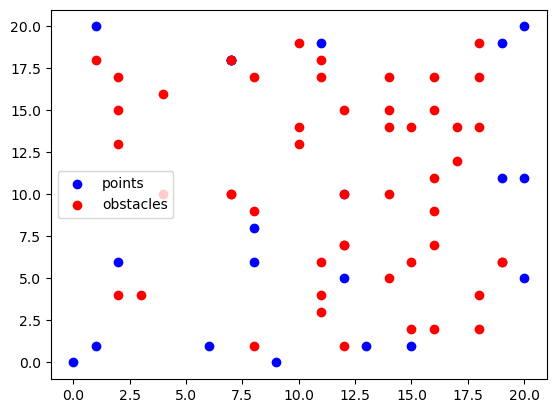

In [31]:
plt.scatter(points_xs, points_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

In [32]:
shortest = minimize(points, obstacles)

In [33]:
print(f"Function result: {F(points, obstacles)}")

Function result: 40000000004863.68


In [34]:
shortest_xs = [shortest[i][0] for i in range(21)]
shortest_ys = [shortest[i][1] for i in range(21)]

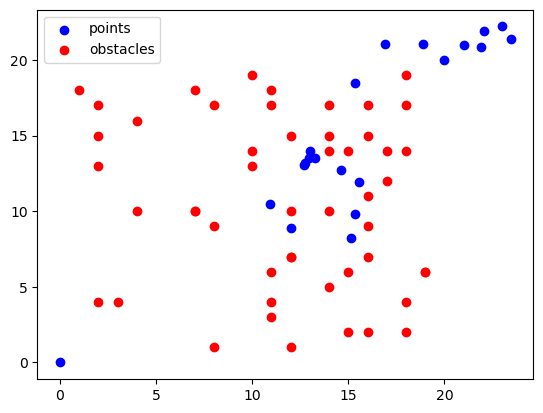

In [35]:
plt.scatter(shortest_xs, shortest_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

## Próba 2

In [36]:
points = [np.array([rng.randrange(0, 21), rng.randrange(0,21)]) for _ in range(21)]
points[0] = np.array([0, 0])
points[-1] = np.array([20, 20])
obstacles = [np.array([rng.randrange(1, 20), rng.randrange(1, 20)]) for _ in range(50)]
points_xs = [points[i][0] for i in range(21)]
points_ys = [points[i][1] for i in range(21)]
obstacles_xs = [obstacles[i][0] for i in range(50)]
obstacles_ys = [obstacles[i][1] for i in range(50)]

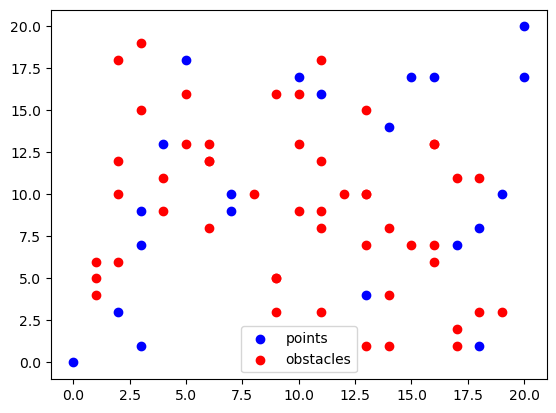

In [37]:
plt.scatter(points_xs, points_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

In [38]:
shortest = minimize(points, obstacles)

In [39]:
print(f"Function result: {F(points, obstacles)}")

Function result: 2540.1306437524804


In [40]:
shortest_xs = [shortest[i][0] for i in range(21)]
shortest_ys = [shortest[i][1] for i in range(21)]

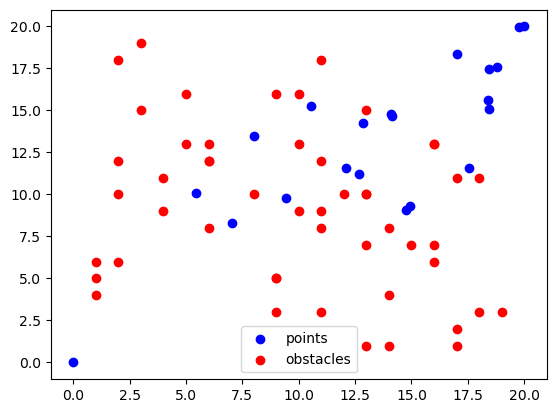

In [41]:
plt.scatter(shortest_xs, shortest_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

## Próba 3

In [42]:
points = [np.array([rng.randrange(0, 21), rng.randrange(0,21)]) for _ in range(21)]
points[0] = np.array([0, 0])
points[-1] = np.array([20, 20])
obstacles = [np.array([rng.randrange(1, 20), rng.randrange(1, 20)]) for _ in range(50)]
points_xs = [points[i][0] for i in range(21)]
points_ys = [points[i][1] for i in range(21)]
obstacles_xs = [obstacles[i][0] for i in range(50)]
obstacles_ys = [obstacles[i][1] for i in range(50)]

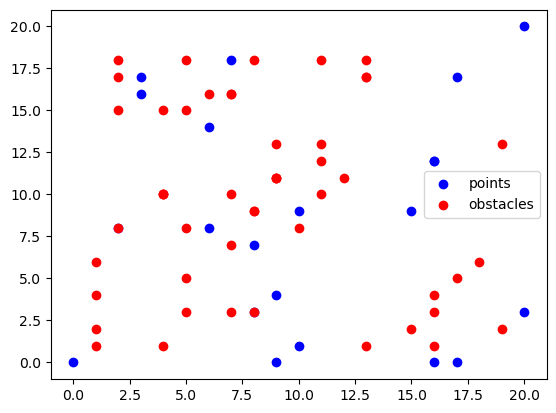

In [43]:
plt.scatter(points_xs, points_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

In [44]:
shortest = minimize(points, obstacles)

In [45]:
print(f"Function result: {F(points, obstacles)}")

Function result: 20000000003079.777


In [46]:
shortest_xs = [shortest[i][0] for i in range(21)]
shortest_ys = [shortest[i][1] for i in range(21)]

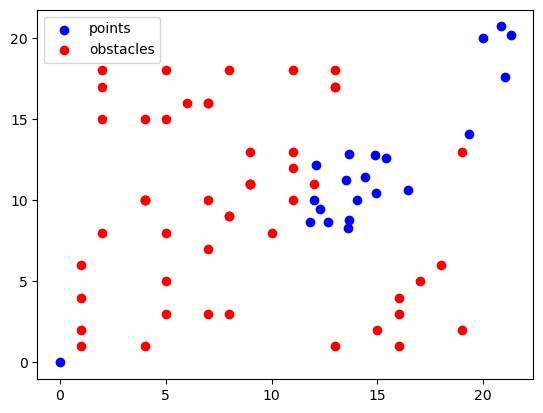

In [47]:
plt.scatter(shortest_xs, shortest_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

## Próba 4

In [48]:
points = [np.array([rng.randrange(0, 21), rng.randrange(0,21)]) for _ in range(21)]
points[0] = np.array([0, 0])
points[-1] = np.array([20, 20])
obstacles = [np.array([rng.randrange(1, 20), rng.randrange(1, 20)]) for _ in range(50)]
points_xs = [points[i][0] for i in range(21)]
points_ys = [points[i][1] for i in range(21)]
obstacles_xs = [obstacles[i][0] for i in range(50)]
obstacles_ys = [obstacles[i][1] for i in range(50)]

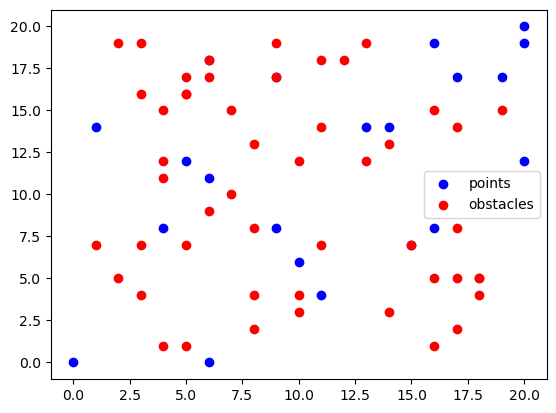

In [49]:
plt.scatter(points_xs, points_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

In [50]:
shortest = minimize(points, obstacles)

In [51]:
print(f"Function result: {F(points, obstacles)}")

Function result: 30000000003386.863


In [52]:
shortest_xs = [shortest[i][0] for i in range(21)]
shortest_ys = [shortest[i][1] for i in range(21)]

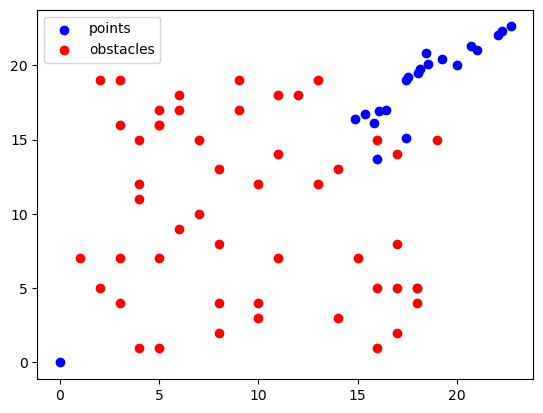

In [53]:
plt.scatter(shortest_xs, shortest_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

## Próba 5

In [54]:
points = [np.array([rng.randrange(0, 21), rng.randrange(0,21)]) for _ in range(21)]
points[0] = np.array([0, 0])
points[-1] = np.array([20, 20])
obstacles = [np.array([rng.randrange(1, 20), rng.randrange(1, 20)]) for _ in range(50)]
points_xs = [points[i][0] for i in range(21)]
points_ys = [points[i][1] for i in range(21)]
obstacles_xs = [obstacles[i][0] for i in range(50)]
obstacles_ys = [obstacles[i][1] for i in range(50)]

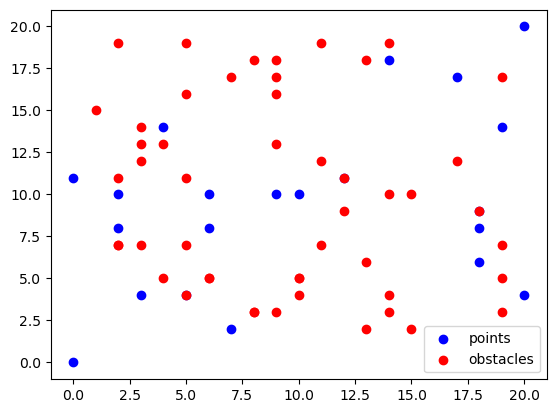

In [55]:
plt.scatter(points_xs, points_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

In [56]:
shortest = minimize(points, obstacles)

In [57]:
print(f"Function result: {F(points, obstacles)}")

Function result: 30000000002305.12


In [58]:
shortest_xs = [shortest[i][0] for i in range(21)]
shortest_ys = [shortest[i][1] for i in range(21)]

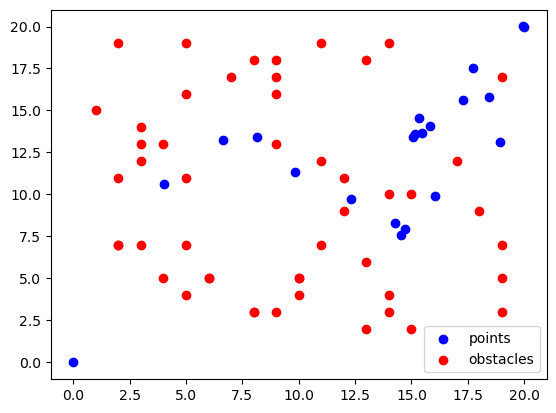

In [59]:
plt.scatter(shortest_xs, shortest_ys, color="blue", label="points")
plt.scatter(obstacles_xs, obstacles_ys, color="red", label="obstacles")
plt.legend()
plt.show()

## Wnioski

Można zauważyć pewną prawidłowość w wyliczaniu ścieżki robota. Pierwszy przystanek jest w znacznej odległości od pola startowego. Wszystkie pozostałe przystanki są znacznie bliżej siebie.